In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import json
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
training_data_path = '../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv'
df = pd.read_csv(training_data_path)
print(f'{df.shape=}')
df.sample(5)

df.shape=(23760, 19)


,steering_angle,waypoint1_lat,waypoint1_lon,waypoint2_lat,waypoint2_lon,waypoint3_lat,waypoint3_lon,waypoint4_lat,waypoint4_lon,waypoint5_lat,waypoint5_lon,waypoint6_lat,waypoint6_lon,waypoint7_lat,waypoint7_lon,waypoint8_lat,waypoint8_lon,waypoint9_lat,waypoint9_lon
2772,-0.300000,2.189449,1.558717,3.373111,4.687729,3.156412,8.167665,3.299858,11.560303,3.969477,14.892955,4.650435,18.224011,5.331434,21.555114,6.012413,24.886194,6.540096,28.239753
10523,0.288917,1.656556,4.007932,2.959492,5.734066,5.230049,6.786137,7.934233,6.774730,10.729491,6.065954,12.853846,4.542897,14.751960,2.185679,16.704698,-0.632113,18.290861,-3.364808
13482,0.000000,-0.514623,-2.038905,-2.843442,-6.360041,-4.562974,-8.035173,-5.538464,-11.313023,-6.000207,-14.384475,-3.828855,-17.247818,-0.823804,-18.266110,2.461099,-19.508774,4.331935,-20.076478
100,0.000000,0.061418,2.037691,0.676856,5.379080,1.357808,8.710141,2.038799,12.041242,2.719771,15.372323,3.336555,18.713962,2.733601,21.997836,0.278526,24.288683,-2.949090,25.266741
2996,-0.000000,-0.008689,4.079769,-0.540658,7.432826,-1.221599,10.763883,-1.902553,14.094959,-2.583522,17.426061,-3.253993,20.759032,-3.029070,24.106023,-0.855057,26.648789,2.274287,27.906285


In [3]:
X = df.drop(columns=['steering_angle'])
y = df['steering_angle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((19008, 18), (4752, 18), (19008,), (4752,))

In [4]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation, Conv1D, Input, Dense, GlobalAveragePooling1D
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from datetime import datetime
from keras.callbacks import ReduceLROnPlateau


model = Sequential([
    Input(shape=(18, 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    Conv1D(32, kernel_size=3, activation='relu'),
    GlobalAveragePooling1D(),
    Dense(64, activation='relu'),
    Dense(1)
])

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
name = 'cnn_64_32_1_dense_64'
checkpoint = ModelCheckpoint(f'../weights/best_{name}_{timestamp}.h5', monitor='val_loss', save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.75, patience=5, min_lr=1e-5, verbose=1)

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 16, 64)            256       
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 32)            6176      
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,609
Trainable params: 8,609
Non-trainable params: 0
______________________________________________________

In [5]:
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=32,
    callbacks=[checkpoint, reduce_lr],
    verbose=1
)

Epoch 1/100
594/594 [==============================] - 14s 9ms/step - loss: 0.0504 - mae: 0.1753 - val_loss: 0.0445 - val_mae: 0.1657 - lr: 0.0010
Epoch 2/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0440 - mae: 0.1636 - val_loss: 0.0399 - val_mae: 0.1541 - lr: 0.0010
Epoch 3/100
594/594 [==============================] - 3s 5ms/step - loss: 0.0391 - mae: 0.1526 - val_loss: 0.0416 - val_mae: 0.1600 - lr: 0.0010
Epoch 4/100
594/594 [==============================] - 3s 6ms/step - loss: 0.0347 - mae: 0.1416 - val_loss: 0.0355 - val_mae: 0.1440 - lr: 0.0010
Epoch 5/100
594/594 [==============================] - 4s 6ms/step - loss: 0.0313 - mae: 0.1332 - val_loss: 0.0272 - val_mae: 0.1203 - lr: 0.0010
Epoch 6/100
594/594 [==============================] - 4s 7ms/step - loss: 0.0293 - mae: 0.1278 - val_loss: 0.0257 - val_mae: 0.1154 - lr: 0.0010
Epoch 7/100
594/594 [==============================] - 3s 5ms/step - loss: 0.0270 - mae: 0.1228 - val_loss: 0.0292 - val_ma

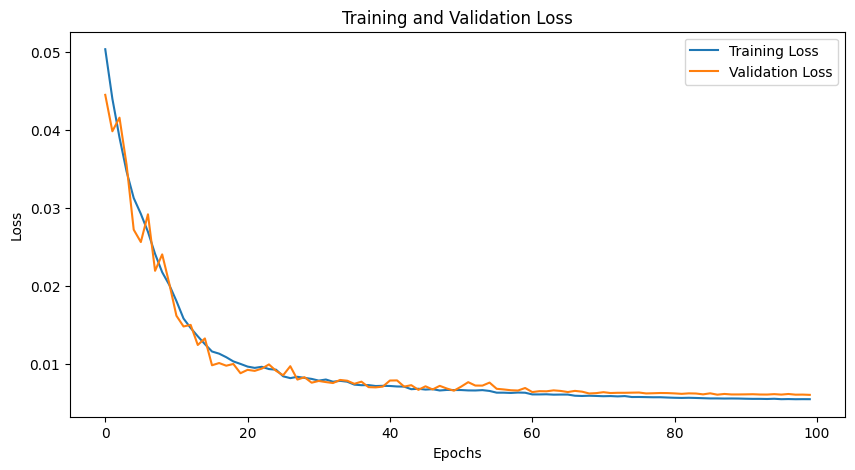

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

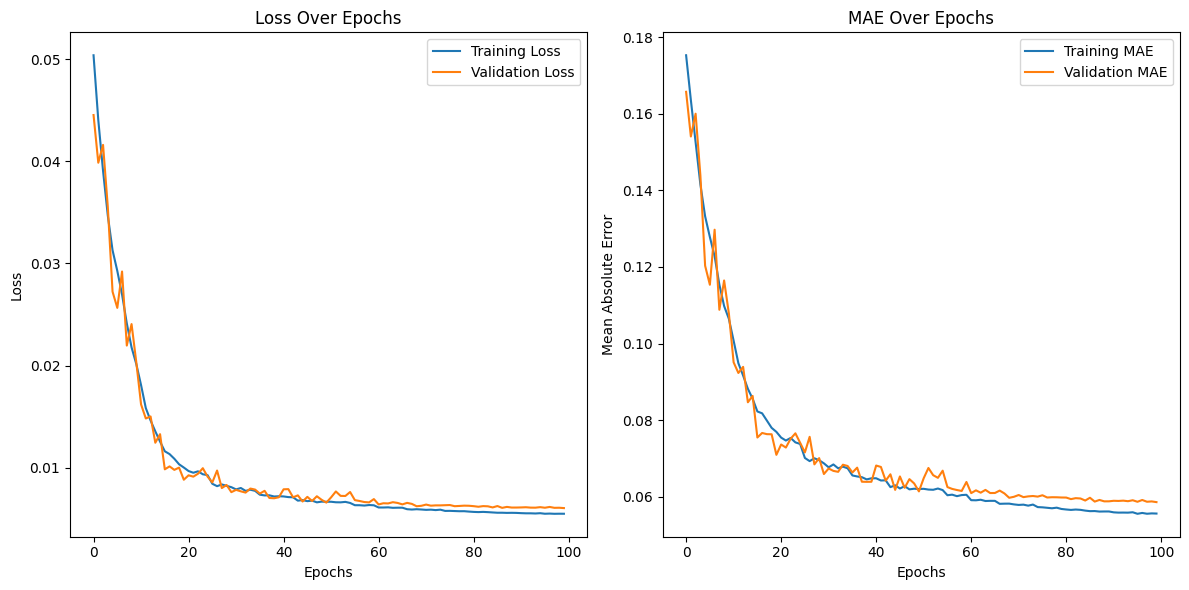

In [7]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('MAE Over Epochs')

plt.tight_layout()
plt.show()

In [8]:
model.load_weights(checkpoint.filepath)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R2)"],
    "Value": [mse, mae, r2]
})

metrics_df

149/149 [==============================] - 1s 4ms/step


,Metric,Value
0,Mean Squared Error (MSE),0.006063
1,Mean Absolute Error (MAE),0.058590
2,R-squared (R2),0.887937


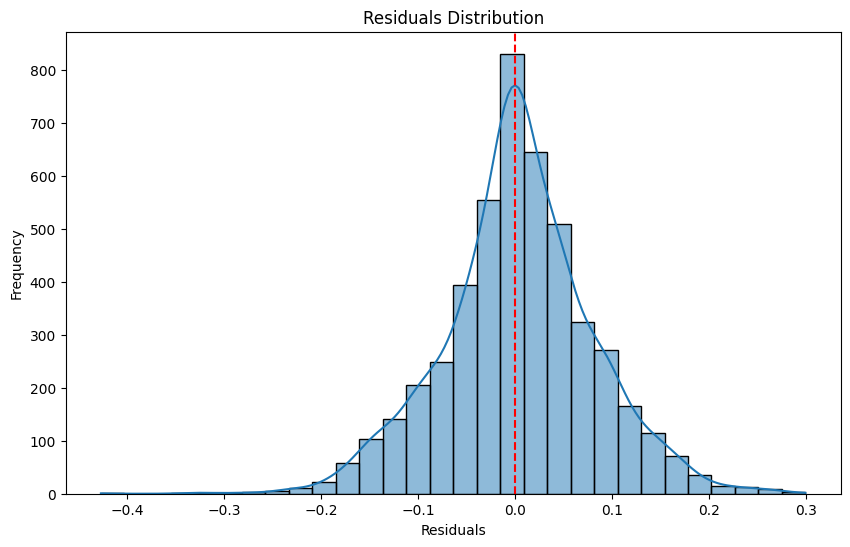

In [9]:
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

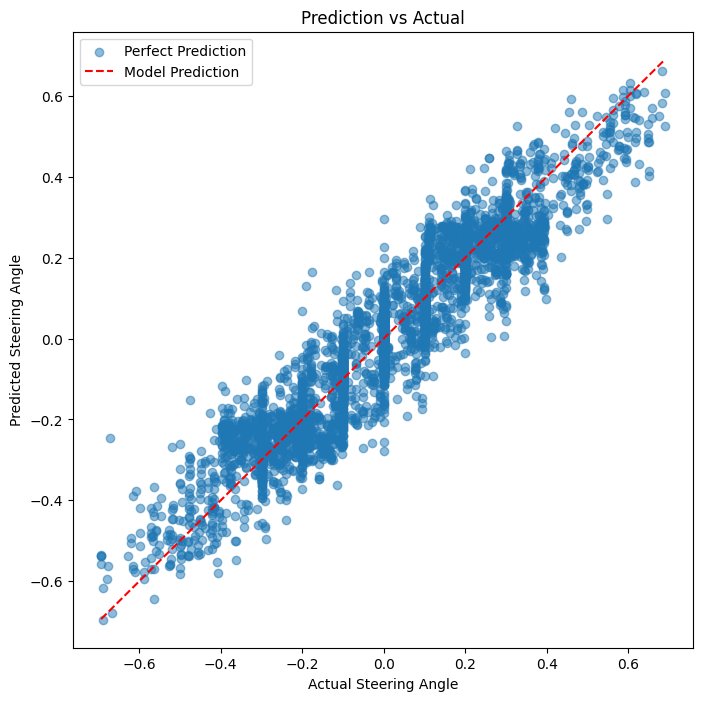

In [10]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Steering Angle')
plt.ylabel('Predicted Steering Angle')
plt.title('Prediction vs Actual')
plt.legend(['Perfect Prediction', 'Model Prediction'])
plt.show()

In [11]:
model_json = model.to_json()
with open(f'../models/{name}.json', 'w') as json_file:
    json.dump(json.loads(model_json), json_file, indent=4)

In [12]:
metadata = {
    "model_name": name,
    "model_path": f"../models/{name}.json",
    "training_data_path": training_data_path,
    "timestamp": timestamp,
    "input_shape": list(X_train.shape[1:]),
    "output_shape": [1],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": ["mae"],
    "training": {
        "epochs": len(history.history['loss']),
        "batch_size": 32,
        "best_model_path": checkpoint.filepath,
        "final_training_loss": history.history['loss'][-1],
        "final_validation_loss": history.history['val_loss'][-1]
    },
    "evaluation": {
        "mse": mse,
        "mae": mae,
        "r2": r2
    }
}

try:
    with open("metadata.jsonl", "r+") as f:
        lines = f.readlines()
        entry = json.dumps(metadata) + "\n"
        if entry not in lines:
            f.write(entry)
except FileNotFoundError:
    with open("metadata.jsonl", "w") as f:
        f.write(json.dumps(metadata) + "\n")

In [13]:
with open("metadata.jsonl", "r") as f:
    lines = f.readlines()

print(json.dumps(json.loads(lines[-1]), indent=4))

{
    "model_name": "cnn_64_32_1_dense_64",
    "model_path": "../models/cnn_64_32_1_dense_64.json",
    "training_data_path": "../data/datasets/training_data_noisy_small_track_symetric_delayed_deviation.csv",
    "timestamp": "20250604_175528",
    "input_shape": [
        18
    ],
    "output_shape": [
        1
    ],
    "optimizer": {
        "type": "Adam",
        "learning_rate": 0.001
    },
    "loss_function": "mse",
    "metrics": [
        "mae"
    ],
    "training": {
        "epochs": 100,
        "batch_size": 32,
        "best_model_path": "../weights/best_cnn_64_32_1_dense_64_20250604_175528.h5",
        "final_training_loss": 0.005508809350430965,
        "final_validation_loss": 0.006063126493245363
    },
    "evaluation": {
        "mse": 0.006063127900733387,
        "mae": 0.05858960665819264,
        "r2": 0.8879371172236021
    }
}
